# 佐賀市の最高気温ページを分析

In [25]:
import numpy
import pandas
import matplotlib.pyplot as plt
import japanize_matplotlib
import re

In [26]:
url = 'http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=85&block_no=47813&year=&month=&day=&elm=monthly&view=a2'

In [27]:
pat = re.compile(r'(\S*)\s')
#pat = re.compile(r'(\d*\.\d*)\D')
def cleanSeries(ser):  
    for k in ser.index:
        v = ser[k]
        if type(v) is str:
            if ' ' in v:
                m = pat.match(v)
                v = m.group(0)
            ser[k]=numpy.float64(v)

<ipython-input-27-34f21fd615d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ser[k]=numpy.float64(v)


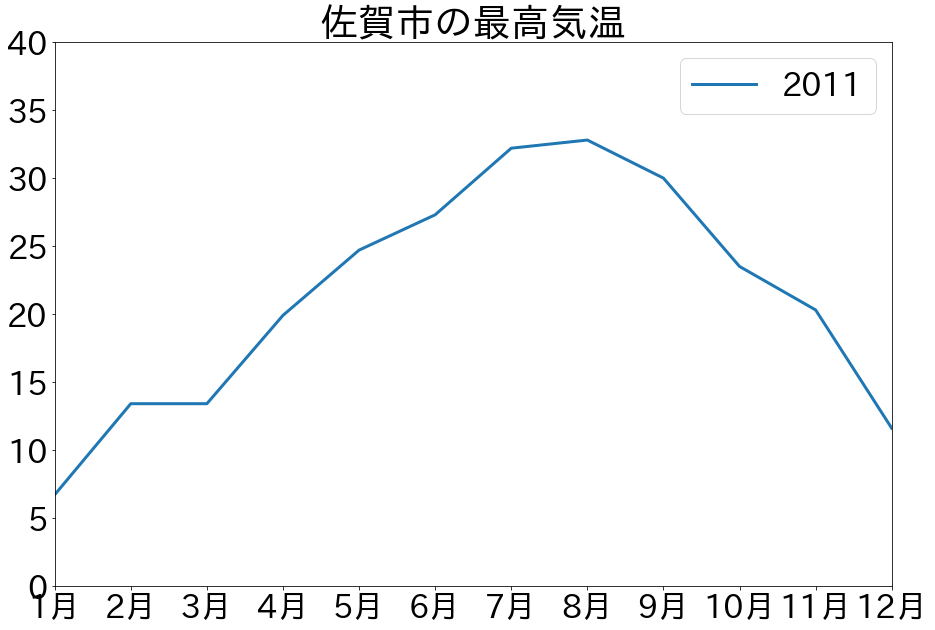

In [28]:

dataFrames = pandas.read_html(url)
df = dataFrames[0].drop('年の値', axis = 'columns')
df.set_index('年', inplace = True)

plt.figure(figsize = (15, 10))
plt.rcParams["font.size"] = 32
plt.title('佐賀市の最高気温')
plt.xlim(0, 11)
plt.ylim(0, 40)
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

year = 2011
ser = df.loc[year]
cleanSeries(ser)
ser.plot(label = str(year), linewidth = 3)

plt.legend(loc = 'best')
plt.savefig('SagaTemperature.pdf')
plt.show()